<a href="https://colab.research.google.com/github/syeadn2001/data_analytics_2/blob/main/miniProjectCOVID19_AdnaanSyed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.shape

(28944, 5)

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [6]:
ny_df = df[df['state']=='New York']

In [7]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [8]:
ny_df.shape

(528, 5)

In [9]:
ny_df.tail()

,date,state,fips,cases,deaths
28702,2021-08-06,New York,36,2166341,53318
28757,2021-08-07,New York,36,2170878,53331
28812,2021-08-08,New York,36,2174515,53346
28867,2021-08-09,New York,36,2176196,53352
28922,2021-08-10,New York,36,2177918,53360


In [10]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']>0] #you want to get a table for when death column values does not equate 0 
first_ny_death.head()                     #the head of this table would start with the first deaths

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [11]:
#total number of cases
ny_df['cases'].max()

2177918

In [12]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

536128762

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previous_case = 0
#.iterrrows returns the index & row of the dataframe
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previuos_case = current_case
  newcase.append(newcase_count)
  print(newcase_count)

Finding new covid 19 deaths on daily basis (new cases added everyday)

In [39]:
newdeaths = []
prevDeaths = 0
i = 0
for index, row in ny_df.iterrows():
  current_deaths = row['deaths']
  newdeaths_count = current_deaths - prevDeaths
  prevDeaths = current_deaths
  newdeaths.append(newdeaths_count)
  print(str(i) + " "+ str(newdeaths_count))
  i+=1
  
  

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 2
14 4
15 4
16 8
17 14
18 7
19 29
20 27
21 47
22 41
23 81
24 117
25 121
26 143
27 290
28 245
29 332
30 417
31 486
32 548
33 753
34 819
35 800
36 814
37 1036
38 953
39 1028
40 996
41 997
42 957
43 882
44 1003
45 936
46 732
47 804
48 668
49 652
50 619
51 628
52 607
53 565
54 547
55 567
56 478
57 463
58 510
59 510
60 329
61 225
62 194
63 541
64 212
65 240
66 928
67 250
68 152
69 226
70 214
71 205
72 279
73 166
74 169
75 138
76 198
77 215
78 134
79 135
80 103
81 123
82 139
83 98
84 146
85 92
86 103
87 98
88 99
89 97
90 77
91 87
92 67
93 81
94 71
95 93
96 55
97 57
98 60
99 56
100 70
101 67
102 55
103 80
104 54
105 40
106 40
107 38
108 39
109 45
110 49
111 23
112 45
113 50
114 36
115 31
116 28
117 46
118 30
119 32
120 6
121 633
122 15
123 23
124 22
125 24
126 35
127 16
128 23
129 11
130 34
131 25
132 15
133 10
134 46
135 17
136 23
137 18
138 14
139 20
140 20
141 16
142 15
143 10
144 42
145 8
146 17
147 10
148 17
149 11
150 9
151 20
15

In [42]:
ny_df['new_cases'] = newcase
ny_df['new_deaths'] = newdeaths

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0
338,2020-03-06,New York,36,44,0,22,0
369,2020-03-07,New York,36,89,0,45,0
404,2020-03-08,New York,36,106,0,17,0
440,2020-03-09,New York,36,142,0,36,0
478,2020-03-10,New York,36,173,0,31,0


In [44]:
ny_df.tail()

,date,state,fips,cases,deaths,new_cases,new_deaths
28702,2021-08-06,New York,36,2166341,53318,3760,3
28757,2021-08-07,New York,36,2170878,53331,4537,13
28812,2021-08-08,New York,36,2174515,53346,3637,15
28867,2021-08-09,New York,36,2176196,53352,1681,6
28922,2021-08-10,New York,36,2177918,53360,1722,8


In [16]:
ny_df['new_cases'].sum()

2177918

In [45]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']
ny_new_deaths = ny_df['new_deaths']

In [18]:
type(ny_new_cases)

pandas.core.series.Series

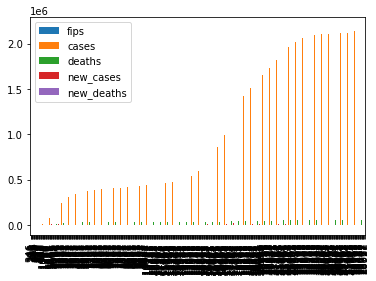

In [46]:
ny_df.plot(kind='bar', )

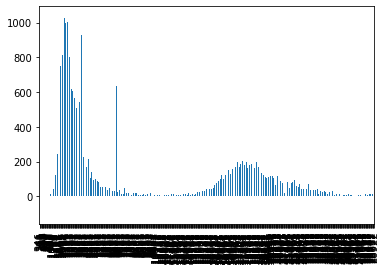

In [47]:
ny_new_deaths.plot(kind='bar')

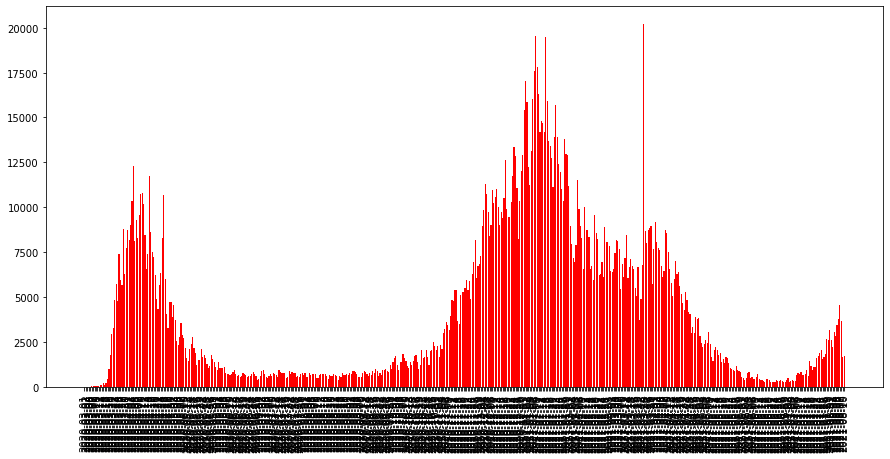

In [20]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [49]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]
ny_new_deaths_30 = ny_new_deaths[-31:-1]

In [30]:
ny_df.tail()

,date,state,fips,cases,deaths,new_cases
28702,2021-08-06,New York,36,2166341,53318,3760
28757,2021-08-07,New York,36,2170878,53331,4537
28812,2021-08-08,New York,36,2174515,53346,3637
28867,2021-08-09,New York,36,2176196,53352,1681
28922,2021-08-10,New York,36,2177918,53360,1722


In [22]:
# ny_dates_30

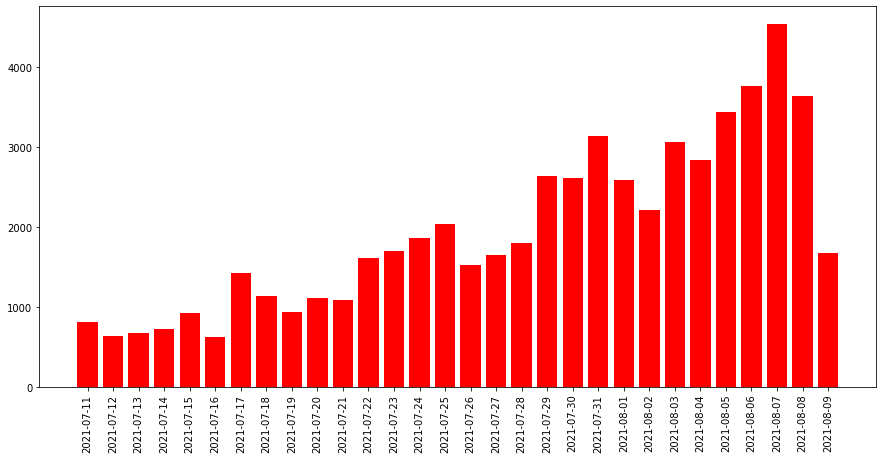

In [23]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

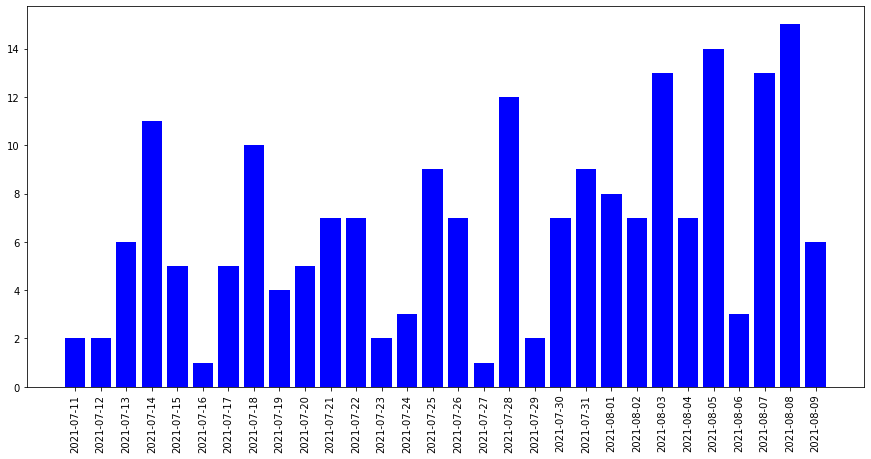

In [51]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [52]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

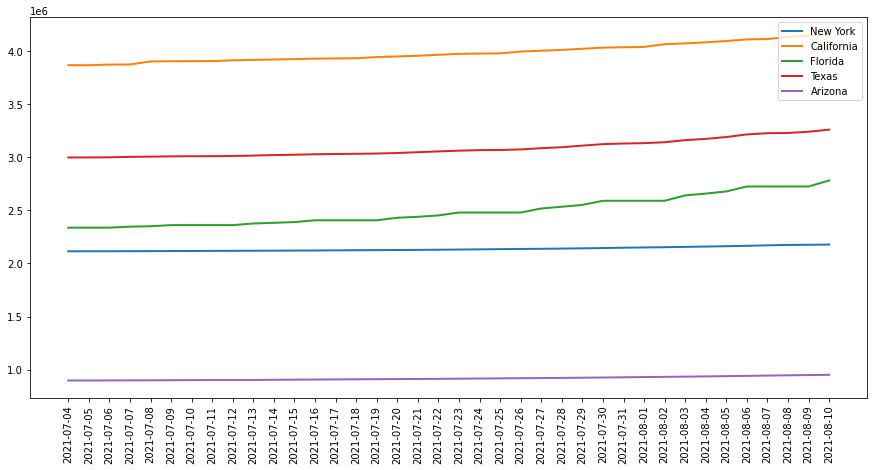

In [53]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2021-07-04')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   **Conclusion 1**

    Based off the final graph comparing the rates of different states in the past 30 days, we can conclude that the cases in California, Texas, and Florida have had a recent uptick in cases, which is probably a result of the new variant rampaging their cities. 
2.   **Conclusion 2**

    Based off the red bar graph illustrating the new cases NY has had in the past 30 days, we can conclude that although the rates haven't been increasing in the same dramatic rate as other states, the rates of COVID cases have been steadily increasing in New York the past 30 days. Despite this slight uptick in cases the amount of deaths seem to remain the same, indicating the value of the vaccine in helping fight this virus. 

3. **Conclusion 3**

    Based from the blue and red bar plots displaying COVID data for New York since its first cases, one can see that high amounts of cases and deaths are clustered together. One can also clearly see the correlation between the cases and deaths, being that during times of high cases, high deaths also followed. 
